# Multi Linear Regression

Prepare a prediction model for profit of 50_startups data.
Do transformations for getting better predictions of profit and
make a table containing R^2 value for each prepared model.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [2]:
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [6]:
data1=data.rename(columns={'R&D Spend':'RDS','Administration':'ADMN','Marketing Spend':'MSD','State':'State','Profit':'Profit'})
data1

,RDS,ADMN,MSD,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


###### correlation analysis

In [7]:
data1.corr()

,RDS,ADMN,MSD,Profit
RDS,1.000000,0.241955,0.724248,0.972900
ADMN,0.241955,1.000000,-0.032154,0.200717
MSD,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


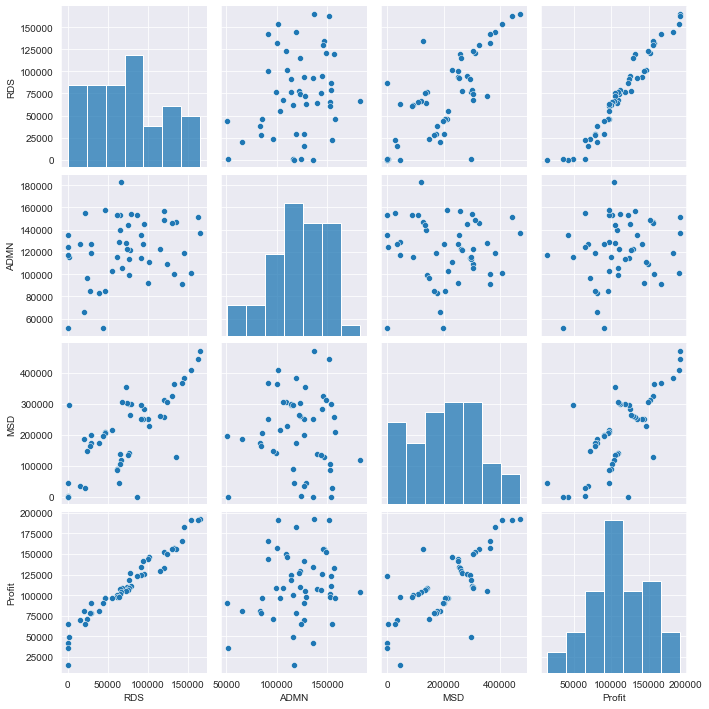

In [8]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

#### model building

In [9]:
!pip install stats

In [11]:
model=smf.ols('Profit~RDS+ADMN+MSD',data=data1).fit()

#### model testing

In [12]:
#coefficients
model.params

Intercept    50122.192990
RDS              0.805715
ADMN            -0.026816
MSD              0.027228
dtype: float64

In [16]:
# t and p values
print(model.tvalues,'\n',model.pvalues)

Intercept     7.626218
RDS          17.846374
ADMN         -0.525507
MSD           1.655077
dtype: float64 
 Intercept    1.057379e-09
RDS          2.634968e-22
ADMN         6.017551e-01
MSD          1.047168e-01
dtype: float64


In [17]:
#r-squared values
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

In [18]:
mlr=smf.ols("Profit~ADMN+MSD",data=data1).fit()

In [19]:
mlr.tvalues,mlr.pvalues

(Intercept    1.142741
 ADMN         2.467779
 MSD          8.281039
 dtype: float64,
 Intercept    2.589341e-01
 ADMN         1.729198e-02
 MSD          9.727245e-11
 dtype: float64)

## model validation

In [21]:
#collinearity check
1)  # calculating variance inflation factor(VIF)
#  VIF=1/(1-rsquare)

rsq_rds=smf.ols("RDS~ADMN+MSD",data=data1).fit().rsquared
vif_rds=1/(1-rsq_rds)
rsq_admn=smf.ols("ADMN~RDS+MSD",data=data1).fit().rsquared
vif_admn=1/(1-rsq_admn)
rsq_msd=smf.ols("MSD~RDS+ADMN",data=data1).fit().rsquared
vif_msd=1/(1-rsq_msd)

In [22]:
#create dataframe
df={'Variables':['RDS','ADMN','MSD'],'VIF':[vif_rds,vif_admn,vif_msd]}
VIF_df=pd.DataFrame(df)
VIF_df

,Variables,VIF
0,RDS,2.468903
1,ADMN,1.175091
2,MSD,2.326773


In [25]:
#2)  #Residual Analysis
 # test for normality of residuals(Q-Q plot)
    

In [26]:
model.resid

0      -259.422890
1      2635.291768
2      8903.110904
3      9205.289974
4     -5951.574183
5     -6589.660571
6     -1991.586669
7     -4268.763048
8       470.070301
9     -5124.724110
10    10612.933633
11     8685.687039
12    12447.465818
13     6819.358337
14   -16945.996335
15   -16318.119985
16    10077.524599
17    -4822.077208
18    -4747.326806
19     7141.643633
20     1834.360769
21    -6006.431640
22    -4354.731717
23    -1262.625221
24    -4810.926113
25     5166.614935
26    -4867.035350
27    -9399.761457
28     1622.353995
29     -790.343452
30      485.217064
31     -204.296276
32    -1573.488985
33    -1136.087805
34     7673.526259
35     5967.910432
36    15422.015415
37      329.602292
38    11531.629352
39    -2723.251977
40     3423.956009
41     2996.273761
42      878.078179
43     9591.940037
44      588.975084
45    17275.430313
46    -6675.456853
47    -3930.858983
48   -13497.978158
49   -33533.734111
dtype: float64

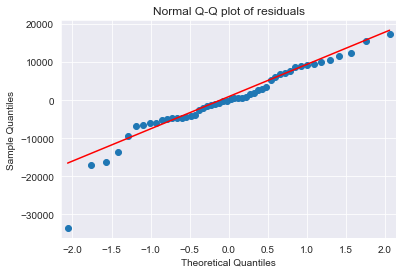

In [29]:
qqplot=sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [30]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

###### residual plot for homoscedasticity

In [34]:
def get_standardized_values(vals):
    return(vals-vals.mean())/vals.std()

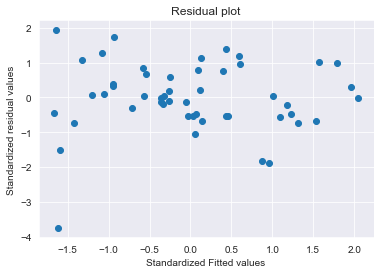

In [36]:
plt.scatter(get_standardized_values(model.fittedvalues),
           get_standardized_values(model.resid))
plt.title('Residual plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

In [37]:
get_standardized_values(model.resid).mean()

0.0

##### residual vs regressors

eval_env: 1


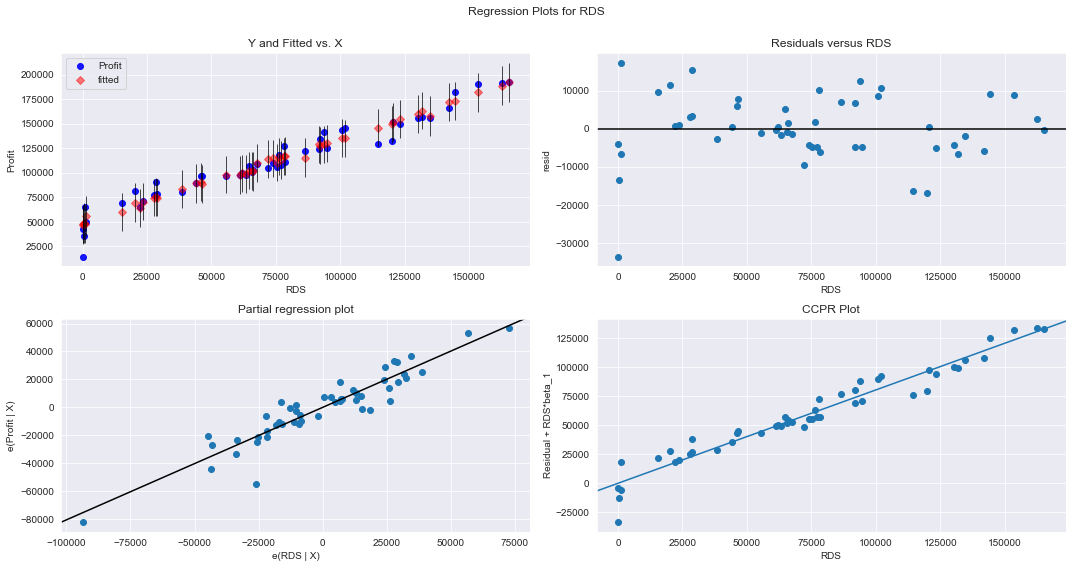

In [38]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"RDS",fig=fig)
plt.show()

eval_env: 1


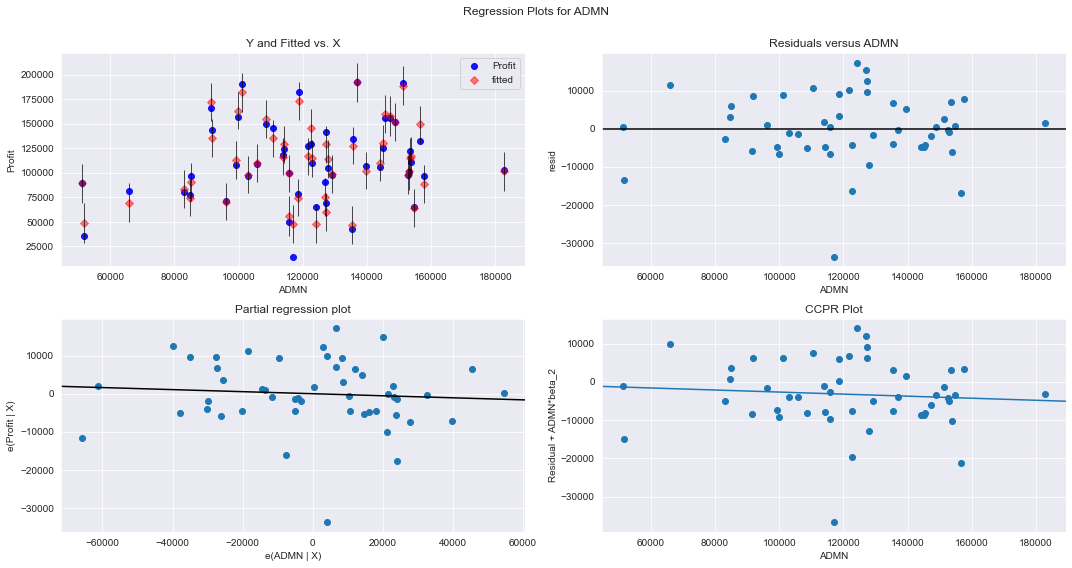

In [39]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"ADMN",fig=fig)
plt.show()

eval_env: 1


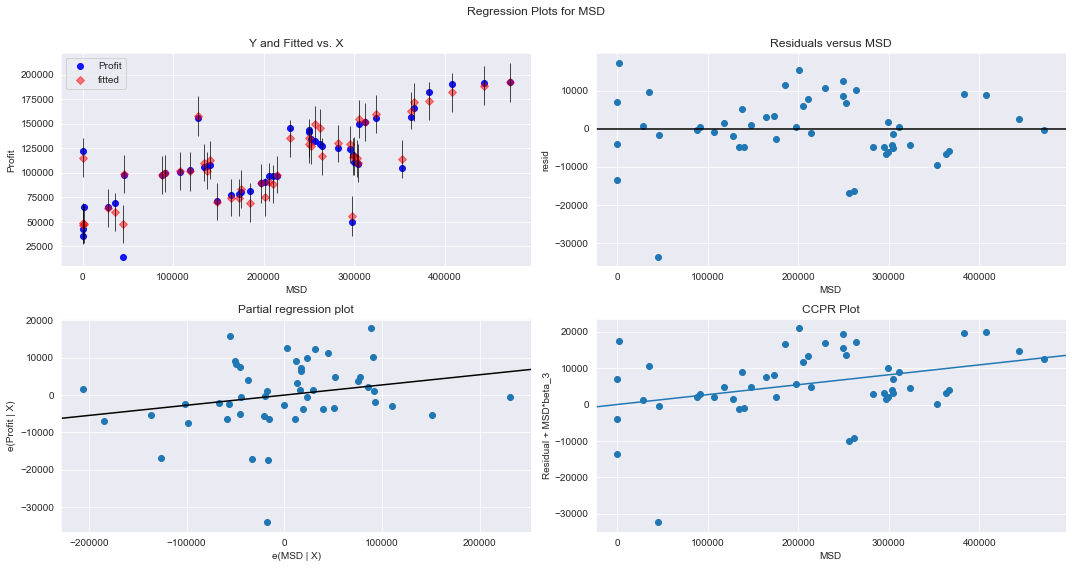

In [40]:
fig=plt.figure(figsize=(15,8))
fig=sm.graphics.plot_regress_exog(model,"MSD",fig=fig)
plt.show()

## model deletion diagnostics

### detecting influencers or outliers

In [41]:
#   Cook's distance

In [43]:
# cook's distance: if cook's distance>1,then it's an outlier
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

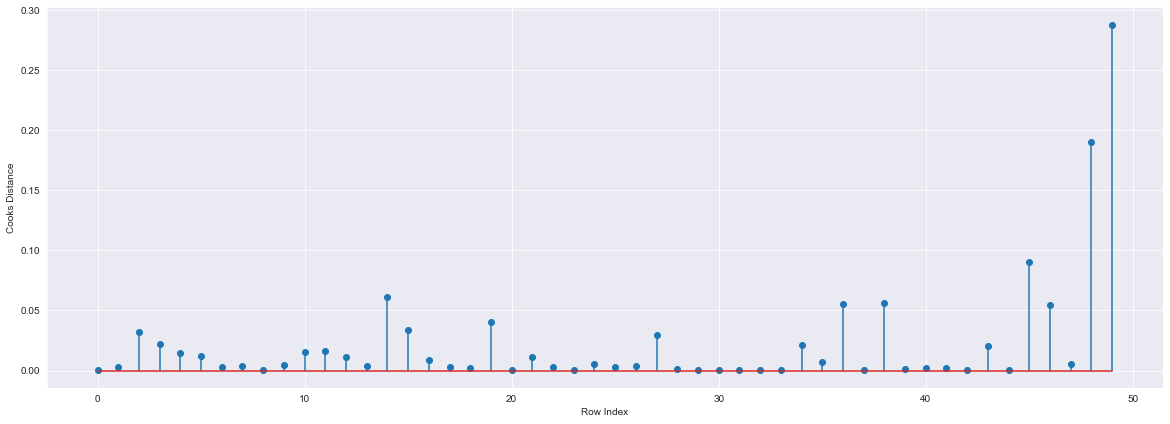

In [45]:
#plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [46]:
# index and value of influencers wherec>0.5
np.argmax(c),np.max(c)

(49, 0.2880822927543263)

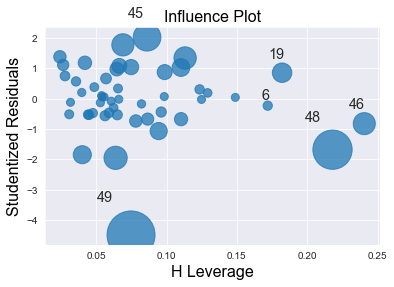

In [47]:
# high influence points
influence_plot(model)
plt.show()

In [48]:
#leverage cut-off values=3*(k+1)/n
#k=no.of variables(columns)
#n=no.of observations(rows)
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff =3*(k+1)/n
leverage_cutoff

0.36

In [49]:
data1[data1.index.isin([49])]

,RDS,ADMN,MSD,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


## improving the model

In [50]:
# discard the datapoints which are influencers and feassign the row no.(reset_index())
data2=data1.drop(data1.index[49],axis=0).reset_index(drop=True)
data2

,RDS,ADMN,MSD,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


### model deletion diagnostics and final model

In [51]:
while np.max(c)>0.5:
    model=smf.ols("Profit~RDS+ADMN+MSD",data=data2).fit()
    (c,_)=model.get_influence().cooks_distance
    c
    np.argmax(c),np.max(c)
    data2=data2.drop(data2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    data2
else:
    final_model=smf.ols("Profit~RDS+ADMN+MSD",data=data2).fit()
    final_model.rsquared,final_model.aic
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9613162435129847


In [52]:
final_model.rsquared

0.9613162435129847

#### model predictions

In [53]:
# new data for predictions
new_data=pd.DataFrame({'RDS':70000,'ADMN':90000,'MSD':140000},index=[0])
new_data

,RDS,ADMN,MSD
0,70000,90000,140000


In [55]:
#manual prediction of price
final_model.predict(new_data)

0    108727.154753
dtype: float64

In [56]:
pred_y=final_model.predict(data2)
pred_y

0     190716.676999
1     187537.122227
2     180575.526396
3     172461.144642
4     170863.486721
5     162582.583177
6     157741.338633
7     159347.735318
8     151328.826941
9     154236.846778
10    135507.792682
11    135472.855621
12    129355.599449
13    127780.129139
14    149295.404796
15    145937.941975
16    117437.627921
17    130408.626295
18    129129.234457
19    116641.003121
20    117097.731866
21    117911.019038
22    115248.217796
23    110603.139045
24    114051.073877
25    103398.054385
26    111547.638935
27    114916.165026
28    103027.229434
29    103057.621761
30    100656.410227
31     99088.213693
32    100325.741335
33     98962.303136
34     90552.307809
35     91709.288672
36     77080.554255
37     90722.503244
38     71433.021956
39     85147.375646
40     76625.510303
41     76492.145175
42     72492.394974
43     62592.049718
44     67025.731107
45     50457.297206
46     58338.443625
47     49375.776655
48     51658.096812
dtype: float64

###### table containing rsquare value for each prepared model

In [57]:
data3={'prep_models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_model.rsquared]}
table=pd.DataFrame(data3)
table

,prep_models,Rsquared
0,Model,0.950746
1,Final_Model,0.961316
